# Pandasチュートリアル

本書は[Pandsのチュートリアル](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html)を翻訳及び説明を追記したものです。    
  
  
@2021 NPO法人AI開発推進協会

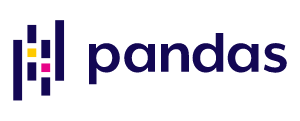

BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2021, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

# <font color=blue>1.pandas概要</font>
pandasは、高速かつ柔軟で表現力豊かなデータ構造を提供するPythonパッケージで、「リレーショナル」または「ラベル付き」データを簡単かつ直感的に扱えるように設計されています。pandasは、Pythonで実用的なデータ分析を行うための基本的な高レベルなビルディングブロックとなることを目指しています。さらに、あらゆる言語で利用可能な最もパワフルで柔軟なオープンソースのデータ分析/操作ツールになるという大きな目標を持っています。この目標に向けて、すでに順調に進んでいます。  
  
pandasは、さまざまな種類のデータに適しています。
  
SQLテーブルやExcelスプレッドシートのような、不均一なタイプの列を持つ表形式データ

順番に並べられた時系列データ、または順番に並べられていない時系列データ（必ずしも固定頻度ではない）。

行と列のラベルを持つ任意の行列データ（同種または異種）。

その他、あらゆる形式の観察／統計データセット。pandasのデータ構造に入れるためには、データにラベルが付いている必要はありません。

pandasの2つの主要なデータ構造、Series（1次元）とDataFrame（2次元）は、金融、統計、社会科学、エンジニアリングの多くの分野における典型的なユースケースの大部分を扱います。pandasは、NumPyの上に構築されており、他の多くのサードパーティのライブラリと科学的な計算環境の中でうまく統合することを目的としています。

ここでは、pandasが得意とする機能のいくつかを紹介します。

+ 浮動小数点データや非浮動小数点データの欠損データ（NaNと表現される）を容易に扱うことができる

+ サイズの変更可能性：DataFrameや高次元のオブジェクトにカラムを挿入・削除可能

+ 自動および明示的なデータ整列：オブジェクトをラベルのセットに明示的に整列させることができます。また、ユーザがラベルを無視して、計算の際にSeriesやDataFrameなどが自動的にデータを整列させることもできる

+ パワフルで柔軟なグループ化機能により、データセットの分割・適用・結合を行い、データの集計・変換を行うことができる

+ 他のPythonやNumPyのデータ構造に含まれる、不規則で異なるインデックスのデータを、簡単にDataFrameオブジェクトに変換することが可能

+ 大規模データセットのインテリジェントなラベルベースのスライス、ファンシーインデックス、およびサブセット化

+ 直感的なデータセットのマージと結合

+ データセットの柔軟なリシェイピングとピボット

+ 階層的な軸のラベル付け（1つの目盛りに複数のラベルを付けることが可能

+ フラットファイル（CSVおよび区切り線）、Excelファイル、データベースからのデータの読み込み、および超高速HDF5フォーマットからのデータの保存／読み込みのためのロバストなIOツール

+ 時系列に特化した機能：日付範囲の生成と頻度の変換、移動ウィンドウ(moving window)の統計、日付のシフト、そしてラギング  
  
これらの原則の多くは、他の言語や科学研究環境でよく経験する欠点を解決するために設けられています。データサイエンティストにとって、データを扱う作業は、データの収集とクリーニング、分析とモデル化、そして分析結果をプロットや表形式での表示に適した形に整理するという、複数の段階に分けられます。
pandasは、これらの作業に最適なツールです。

#### その他の注意点

pandasは速い。低レベルのアルゴリズムの多くは、Cythonのコードで広範囲に調整されています。しかし、何でもそうですが、一般化すると性能が犠牲になります。そのため、自分のアプリケーションのために1つの機能に集中すれば、より高速な専用ツールを作ることができるかもしれません。

pandasはstatsmodelsに依存しており、Pythonの統計計算エコシステムの重要な部分を占めています。

pandasは金融関係のアプリケーションで広く使用されています。

### データ構造

|次元             | Name               | 説明                                         |
|:---------------:|:------------------:|:---------------------------------------------|
|     1           |  Series            | 1次元ラベル付き同型配列                      |
|     2           |  DataFrame         | 一般的な2Dラベル付き、サイズ変更可能な表形式で、潜在的に異質なタイプのカラムを持つ      |
  
#### なぜ複数のデータ構造があるのか？
pandasのデータ構造については、低次元のデータのための柔軟なコンテナとして考えるのが一番です。例えば、DataFrameはSeriesのコンテナであり、Seriesはスカラーのコンテナでもあります。辞書のような方法で、これらのコンテナにオブジェクトを挿入したり削除したりできるようにしたいと考えています。

また、時系列や断面のデータセットの典型的な向きを考慮した、一般的なAPI関数の賢明なデフォルト動作が必要です。2次元や3次元のデータを格納するためにN次元配列（ndarrays）を使用する場合、関数を書くときにデータセットの向きを考慮することはユーザーに負担をかけます。軸は多かれ少なかれ同等とみなされます（C言語やFortranの連続性がパフォーマンスに影響する場合を除く）。pandasでは、軸はデータにより多くの意味的な意味を持たせることを目的としています。つまり、特定のデータセットに対して、データの向きを変える「正しい」方法があると考えられるからです。つまり、下流の機能でデータ変換をコード化する際の精神的な負担を軽減することを目的としています。  
  
例えば、表形式のデータ（DataFrame）では、軸0と軸1ではなく、インデックス（行）と列を考えた方が意味的にわかりやすいです。  


` for col in df.columns:`  
&nbsp;&nbsp;&nbsp;&nbsp;`    series = df[col]`  
&nbsp;&nbsp;&nbsp;&nbsp;`# do something with series`

#### データの変更可能性とコピー
すべてのpandasのデータ構造は値の変更が可能です（含まれる値は変更できます）が、常にサイズの変更が可能であるとは限りません。例えば、Seriesの長さは変更できませんが、DataFrameに列を挿入することは可能です。しかし、ほとんどのメソッドは新しいオブジェクトを生成し、入力データはそのままにしておきます。一般的には、賢明な場合は不変性を優先します。

#### サポートを受ける
pandasの問題やアイデアは、まず[Github Issue Tracker](https://github.com/pandas-dev/pandas/issues)に投稿されます。一般的な質問については、[Stack Overflow](https://stackoverflow.com/questions/tagged/pandas) を通じて pandas コミュニティのエキスパートが回答します。

#### コミュニティ
pandasは、オープンソースのpandasを実現するために貴重な時間とエネルギーを提供してくれる世界中の志を持った人たちのコミュニティによって、今日も積極的にサポートされています。[貢献者の皆さん](https://github.com/pandas-dev/pandas/graphs/contributors)に感謝します。

貢献に興味のある方は、[貢献ガイド](https://pandas.pydata.org/pandas-docs/stable/development/contributing.html#contributing)をご覧ください。

pandasは、[NumFOCUS](https://numfocus.org/sponsored-projects)のスポンサープロジェクトです。これにより、世界的なオープンソース・プロジェクトとしてのpandasの開発を成功させることができ、[プロジェクトへの寄付](https://pandas.pydata.org/donate.html)も可能になります。

#### プロジェクトガバナンス
2008年の発足以来、pandasプロジェクトが非公式に使用してきたガバナンス・プロセスは、[プロジェクト・ガバナンス・ドキュメント](https://github.com/pandas-dev/pandas-governance)で公式化されています。この文書では、オープンソースの共同開発と、営利・非営利団体からの資金提供を受けた作業との関係を含め、意思決定の方法やコミュニティのさまざまな要素がどのように相互作用するのかを明確にしています。

Wes McKinneyはBenevolent Dictator for Life (BDFL)です。

#### 開発チーム
コアチームのメンバーのリストと詳細な情報は、governance repoの[people's page](https://github.com/pandas-dev/pandas-governance/blob/master/people.md)に掲載されています。

#### 機関投資家
現在の機関パートナーについての情報は、pandasのウェブサイトのページにあります。

# <font color=blue>2.pandasはどのようなデータを扱うのでしょうか？</font>

<font color=navy size=4>【ユースケース１】</font>  
>pandasを使うには

In [ ]:
import pandas as pd

> pandasパッケージをロードして作業を開始するには、パッケージをインポートします。コミュニティで合意されたpandasのエイリアスは<font color=red>pd</font>で、pandasを<font color=red>pd</font>として読み込むことは、すべてのpandasドキュメントの標準的な方法とされています。

## pandasのテーブル表現
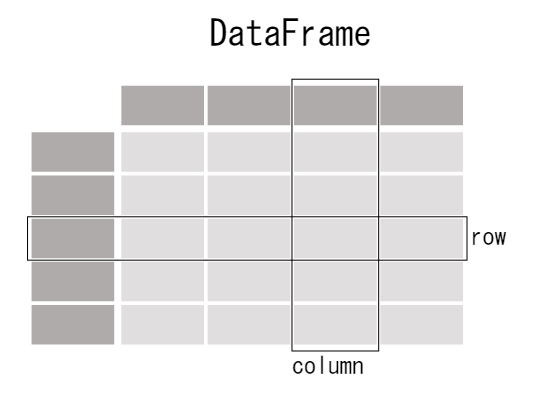
  

<font color=navy size=4>【ユースケース２】</font>   
> タイタニック号の乗客データを保存したいと考えています。何人かの乗客について、名前（文字）、年齢（整数）、性別（男性／女性）のデータがわかっています。

In [ ]:
 df = pd.DataFrame(
     {
         "Name": [
             "Braund, Mr. Owen Harris",
             "Allen, Mr. William Henry",
             "Bonnell, Miss. Elizabeth",
         ],
         "Age": [22, 35, 58],
         "Sex": ["male", "male", "female"],
     }
 )

df

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


> データをテーブルに手動で格納するには、DataFrame を作成します。Pythonのリストの辞書を使用する場合、辞書のキーが列のヘッダーとして使用され、各リストの値がDataFrameの列として使用されます。

DataFrameは2次元のデータ構造で、さまざまな種類のデータ（文字、整数、浮動小数点値、カテゴリーデータなど）を列に格納することができます。スプレッドシートやSQLテーブル、Rのdata.frameに似ています。  
  
+ テーブルには3つの列があり、それぞれの列には列ラベルが付いています。列ラベルは、それぞれName、Age、Sexです。  
    
+ Name列は各値が文字列のテキストデータ、Age列は数字、Sex列はテキストデータで構成されています。  
  
表計算ソフトでは、このデータを表にして表現すると、とてもよく似ています。　　
　　
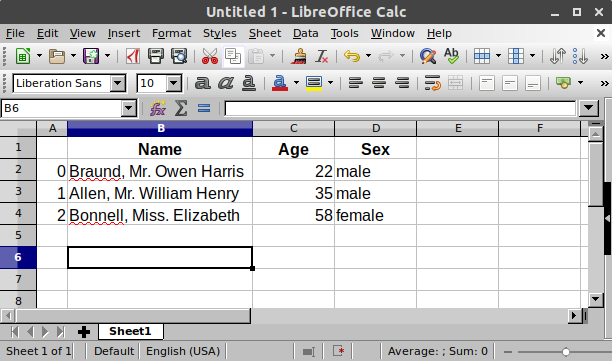

## DataFrameの各列は、「シリーズ」です。  
  
  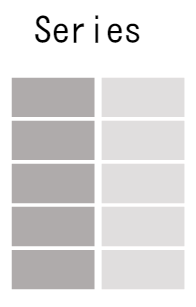

<font color=navy size=4>【ユースケース３】</font>  
>「年齢(age)」列のデータを扱いたい

In [ ]:
df["Age"]

0    22
1    35
2    58
Name: Age, dtype: int64

> pandas DataFrameの1列を選択すると、結果はpandas Seriesとなります。列を選択するには、角括弧[]で囲まれた列ラベルを使用します。

---
[ノート]  
Pythonの辞書に慣れている方であれば、単一のカラムを選択することは、キーに基づいて辞書の値を選択することと非常によく似ています。
---

Seriesも同様に最初から作ることができます。

In [ ]:
ages = pd.Series([22, 35, 58], name="Age")
ages

0    22
1    35
2    58
Name: Age, dtype: int64

pandas Seriesは、DataFrameの単一列であるため、列ラベルはありません。Seriesには行ラベルがあります。

## DataFrameやSeriesを使って何かをする  


<font color=navy size=4>【ユースケース４】</font>  
>乗客の最大年齢を知りたい。。。  
 Age列を選択してmax()を適用することで、DataFrameでこれを行うことができます。

In [ ]:
df["Age"].max()

58

または、Seriesに適用して

In [ ]:
ages.max()

58

max()メソッドのように、pandasは多くの機能を提供しており、それらの機能はそれぞれDataFrameやSeriesに適用できるメソッドとなっています。メソッドは関数であるため、括弧()を使うことを忘れないでください。

<font color=navy size=4>【ユースケース５】</font>  
>データテーブルの数値データの基本的な統計に興味があります。

In [ ]:
df.describe()

,Age
count,3.000000
mean,38.333333
std,18.230012
min,22.000000
25%,28.500000
50%,35.000000
75%,46.500000
max,58.000000


>describe()メソッドは、DataFrameの数値データの概要を簡単に表示します。Name および Sex カラムはテキストデータであるため、デフォルトでは describe() メソッドはこれらを考慮しません。

多くのpandas操作は、DataFrameまたはSeriesを返します。describe()メソッドは、pandas Seriesまたはpandas DataFrameを返すpandasオペレーションの一例です。  
※describeのオプションについては、ユーザーガイドの[describeを使った集約](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-describe)の項を参照してください。

---
[ノート]  
これはあくまでも出発点です。表計算ソフトと同様に、pandasはデータを列と行で構成されたテーブルとして表現します。表計算ソフトで行うようなデータ操作や計算も、pandasではサポートされています。次のチュートリアルに進んでください。
---

### <font color='orange' size=5> ２章で覚えたこと</font>

+ <font size=4>パッケージをインポートする、`import pandas as pd` </font>  
&nbsp;
+ <font size=4>データのテーブルは、pandas DataFrameとして格納される</font>  
&nbsp;
+ <font size=4>DataFrameの各列はSeries</font>  
&nbsp;
+ <font size=4>DataFrameやSeriesにメソッドを適用することで、様々なことができる</font>

# <font color=blue>3.表形式のデータを読み書きするにはどうすればいいですか？</font>  
  
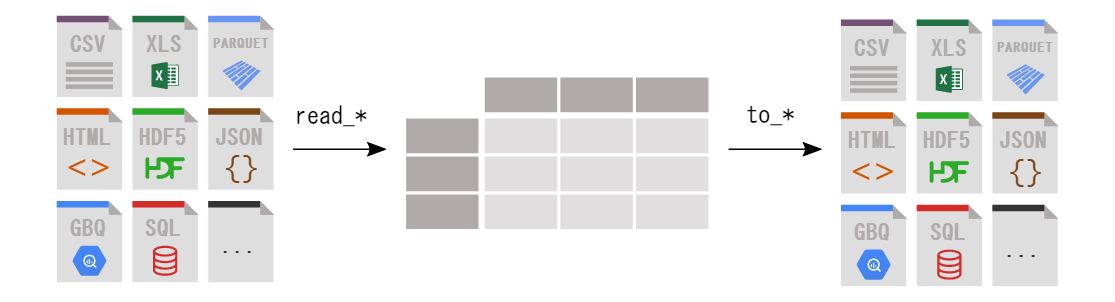

<font color=gray>※この章では、CSV形式で保存されたチュートリアルサイトにある[タイタニックのデータセット](https://github.com/pandas-dev/pandas/blob/master/doc/data/titanic.csv)を使用します。データは以下のデータ列で構成されています。</font>

+ PassengerId: すべての乗客のID。
+ Survived: 0と1の値を持ちます。0は非生存、1は生存です。
+ Pclass: 3つのクラスがあります。クラス1、クラス2、クラス3です。
+ Name: 搭乗者の名前です。
+ Sex: 搭乗者の性別
+ Age: 搭乗者の年齢
+ SibSp: 搭乗者に兄弟姉妹や配偶者がいることを示します。
+ Parch: 搭乗者が一人であるか、家族がいるかを示します。
+ Ticket:搭乗者のチケット番号です。
+ Fare:  運賃を表示します。
+ Cabin: 搭乗者のキャビンです。
+ Embarked: 乗車したカテゴリーを表します。

<font color=navy size=4>【ユースケース６】</font>  
>CSVファイルで提供されているタイタニック号の乗客データを分析したい

In [ ]:
# Githubに公開されているデータを直接読み込む
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv'
titanic = pd.read_csv(url)

>pandasは、csvファイルとして保存されているデータをpandas DataFrameに読み込むためのread_csv()関数を提供しています。pandasは、様々なファイル形式やデータソースをサポートしており、それぞれに<font color=red>read_*</font>という接頭辞がついています。

データを読み込んだ後は、必ずチェックを入れてください。DataFrameを表示する際、<font color=red>デフォルトでは最初と最後の5行が表示</font>されます。

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<font color=navy size=4>【ユースケース７】</font>  
>pandasのDataFrameの最初の8行を見たい

In [ ]:
titanic.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


>DataFrameの最初のN行を表示するには、必要な行数（ここでは8行）を引数に指定してhead()メソッドを使用します。

---
[ノート]  
代わりに最後のN行の興味がありますか？ pandasにはtail()メソッドもあります。例えば、titanic.tail(10)は、DataFrameの最後の10行を返します。  
<font color=green>[補足］引数を省略した場合「 head()、tail() 」は、５行表示されます</font>
---

pandasが各カラムのデータタイプをどのように解釈したかを確認するには、pandas dtypes属性をリクエストします。

In [ ]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

各列には、使用されているデータタイプが列挙されています。このDataFrameのデータ型は、整数（int64）、浮動小数点（float64）、文字列（object）です。

---
[ノート]  
dtypesを求めるときには、括弧は使用されません！ dtypesはDataFrameとSeriesの属性です。DataFrameやSeriesの属性には、括弧は必要ありません。属性はDataFrameやSeriesの特徴を表していますが、最初のチュートリアルで紹介したように、メソッド（括弧が必要）はDataFrameやSeriesに対して何かを行います。
---

<font color=navy size=4>【ユースケース８】</font>  
>タイタニックのデータをスプレッドシートとして出力する

In [ ]:
titanic.to_excel("titanic.xlsx", sheet_name="passengers", index=False)

> <font color=green>[補足] openpyxlモジュールがないエラーが出た場合、セルを追加し下記でモジュールのインストールをしてください。   
>   ※「!pip」はシステムコマンドでpipをipython上で実行します    
       `!pip install openpyxl` </font>

>read_*関数がデータをpandasに読み込むために使用されるのに対し、<font color=red> to_* </font>メソッドはデータを保存するために使用されます。<font color=red> to_excel() </font>メソッドは、データをエクセルファイルとして保存します。ここでの例では、シート名をデフォルトのSheet1ではなく、passengersとしています。index=Falseを設定すると、行のインデックスラベルはスプレッドシートに保存されません。

同等の読み込み関数であるread_excel()は、データをDataFrameに再読み込みします。

In [ ]:
titanic = pd.read_excel("titanic.xlsx", sheet_name="passengers")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font color=navy size=4>【ユースケース９】</font>  
>DataFrameのテクニカルサマリーに興味がある

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


>info()メソッドはDataFrameに関する技術的な情報を提供しますので、出力内容をより詳しく説明しましょう。
>+ これは確かに DataFrame です。
>+ 891 個のエントリ、つまり 891 行があります。
>+ 各行には、0 から 890 までの値を持つ行ラベル（別名インデックス）があります。
>+ 表には12の列があります。ほとんどの列には、各行の値があります（891 個の値はすべて非ヌル）。いくつかの列では、値が欠落しており、非ヌルの値が891未満のものもあります。
>+ Name（名前）、Sex（性別）、Cabin（船室）、Embarked（乗船）の列は、テキストデータ（文字列、別名オブジェクト）で構成されています。その他の列は数値データであり、整数のものと実数（浮動小数点）のものがあります。
>+ 各列のデータの種類（文字、整数、...）は、dtypesのリストにまとめられています。
>+ また、DataFrameを格納するために使用されるRAMのおおよその量も提供されます。

### <font color='orange' size=5> ３章で覚えたこと</font>
+ <font size=4>多くの異なるファイル形式やデータソースからpandasにデータを取り込むことは、「 read_* 」関数でサポートされている</font>  
&nbsp;
+ <font size=4>pandasからデータをエクスポートするには、さまざまな「 to_* 」メソッドが用意されている</font>  
&nbsp;
+ <font size=4>head/tail/infoメソッドとdtypes属性は、最初のチェックに便利</font>

<font color=olive>pandasとの間で可能な入出力の概要については、ユーザーガイドの[リーダーとライター機能のセクション](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io)を参照してください。</font>

## <font color=blue>４．DataFrameのサブセットを選択するにはどうすればいいですか？</font>

### DataFrameから特定の列を選択するにはどうすればいいですか？


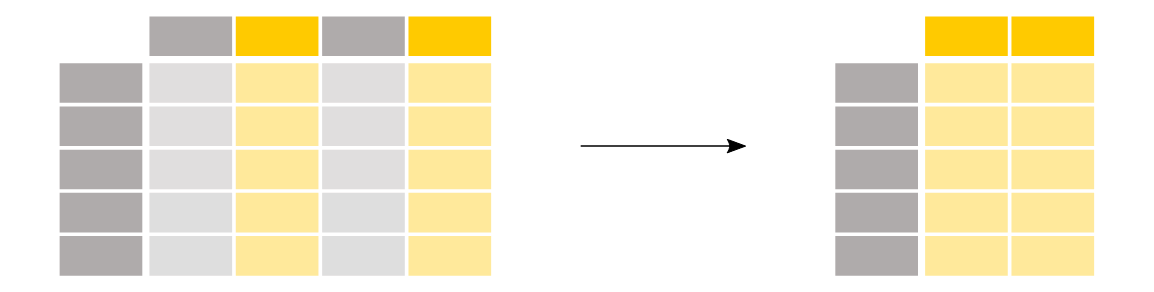

<font color=navy size=4>【ユースケース１０】</font>  
> タイタニックの乗客の年齢に興味がある

In [ ]:
ages = titanic["Age"]
ages.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

>単一のカラムを選択するには、角括弧 [ ] に対象のカラム名を使用します。

DataFrameの各列はSeriesです。単一の列が選択されると、返されるオブジェクトはpandas Seriesになります。これは、出力のタイプを確認することで確認できます。

In [ ]:
type(titanic["Age"])

pandas.core.series.Series

そして、出力の形を見てみてください。

In [ ]:
titanic["Age"].shape

(891,)

[DataFrame.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)は、pandas Seriesの属性（読み書きのチュートリアルを思い出してください、属性に括弧を使ってはいけません）であり、行数と列数(nrows, ncolumns)を含むDataFrameです。 pandas Seriesは1次元であり、行数のみが返されます。

<font color=navy size=4>【ユースケース１１】</font>  
>タイタニックの乗客の年齢と性別に興味がある。

In [ ]:
age_sex = titanic[["Age", "Sex"]]
age_sex.head()

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


>複数の列を選択するには、括弧[]の中に選択する列名をリストします。

---
[ノート]  
内側の角括弧は、Pythonのリストを列名で定義しているのに対し、外側の角括弧は、前の例で見たように、pandasのDataFrameからデータを選択するために使用されます。
---

返されるデータタイプは、pandas DataFrameです。

In [ ]:
type(titanic[["Age", "Sex"]])

pandas.core.frame.DataFrame

In [ ]:
titanic[["Age", "Sex"]].shape

(891, 2)

選択した結果、891の行と2つの列を持つDataFrameが返されました。DataFrameは、行と列の両方の次元を持つ2次元であることを覚えておいてください。

<font color=olive>インデックス作成の基本情報については、ユーザーガイドの[「インデックス作成とデータ選択」](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-basics)の項を参照してください。</font>

斜体テキスト### DataFrameから特定の行をフィルタリングするにはどうしたらいいですか？   
  
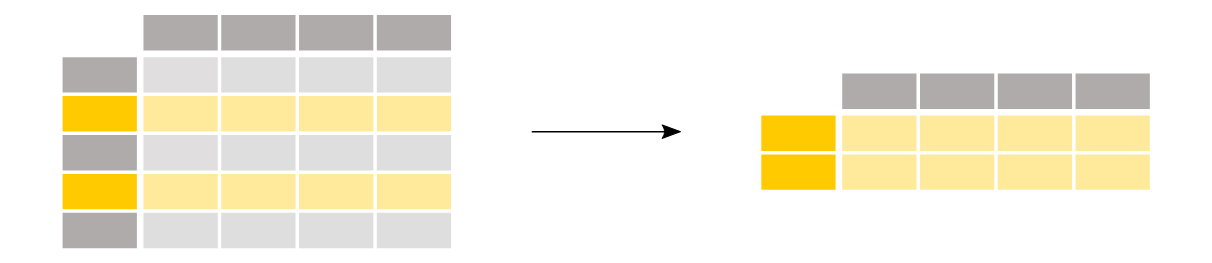

<font color=navy size=4>【ユースケース１２】</font>  
>35歳以上の乗客に興味がある

In [ ]:
above_35 = titanic[titanic["Age"] > 35]
above_35.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


> 条件式に基づいて行を選択するには、括弧 [] の中に条件を入れます。

括弧内の条件 titanic["Age"] > 35 は、Age 列の値が 35 より大きい行をチェックします。

In [ ]:
titanic["Age"] > 35

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

条件式の出力（>だけでなく、==, !=, <, <=,...でも動作します）は、実際には、元のDataFrameと同じ行数を持つ、ブーリアン値（TrueまたはFalseのいずれか）のpandasシリーズです。このようなブーリアン値の系列は、括弧 [] の間に置くことで、DataFrameのフィルタリングに使用できます。値が True の行のみが選択されます。

先ほどから、元のタイタニックのDataFrameは891行で構成されていることがわかっています。それでは、結果として得られた DataFrame above_35 のshape属性を確認して、条件を満たす行数を見てみましょう。

In [ ]:
above_35.shape

(217, 12)

<font color=navy size=4>【ユースケース１３】</font>  
> タイタニックの客室クラス2と3の乗客に興味がある

In [ ]:
class_23 = titanic[titanic["Pclass"].isin([2, 3])]
class_23.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


> 条件式と同様に、条件関数 [isin()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html#pandas.Series.isin) は、指定されたリストに値がある各行に対して True を返します。このような関数に基づいて行をフィルタリングするには、括弧 [] の中で条件関数を使用します。この例では、括弧内の条件の titanic["Pclass"].isin([2, 3]) は、Pclass列が2または3のいずれかである行をチェックします。

上記は、クラスが2または3である行でフィルタリングし、2つの文を｜（or）演算子で結合することと同じです。

In [ ]:
class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]
class_23.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


----
[ノート]  
複数の条件文を組み合わせる場合は、それぞれの条件を括弧（）で囲む必要があります。また、or/andは使用できず、or演算子 '｜' とand演算子 '＆' が必要です。
---

<font color=olive>[ブーリアンインデックス](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-boolean)や[isin関数](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-basics-indexing-isin)については、ユーザーガイドの専用セクションを参照してください。</font>

<font color=navy size=4>【ユースケース１４】</font>  
> 年齢がわかっている乗客データを扱いたい

In [ ]:
age_no_na = titanic[titanic["Age"].notna()]
age_no_na.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> [notna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.notna.html#pandas.Series.notna)条件付き関数は、値がNull値でない各行に対してTrueを返します。この関数は、括弧 [] と組み合わせて、データテーブルをフィルタリングすることができます。

最初の5行は同じ値のままなので、実際に何が変わったのか疑問に思うかもしれません。それを確かめる一つの方法は、形状が変わったかどうかを確認することです。

In [ ]:
age_no_na.shape

(714, 12)

<font color=olive>欠損値に関する専用機能については、ユーザーガイドの[欠損データ](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data)の取り扱いの項を参照してください。</font>

### DataFrameから特定の行や列を選択するには？
  
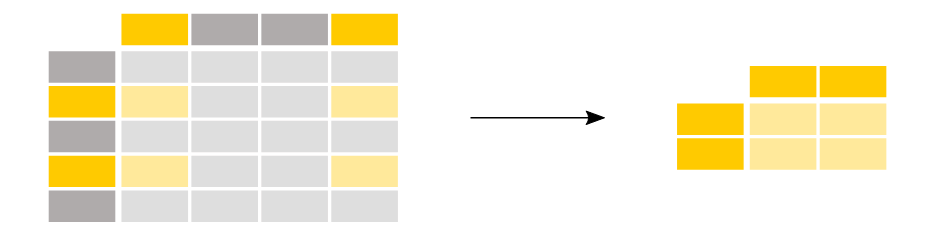

<font color=navy size=4>【ユースケース１５】</font>  
> 35歳以上の乗客の名前に興味がある

In [ ]:
adult_names = titanic.loc[titanic["Age"] > 35, "Name"]
adult_names.head()

1     Cumings, Mrs. John Bradley (Florence Briggs Th...
6                               McCarthy, Mr. Timothy J
11                             Bonnell, Miss. Elizabeth
13                          Andersson, Mr. Anders Johan
15                     Hewlett, Mrs. (Mary D Kingcome) 
Name: Name, dtype: object

この場合、行と列の両方のサブセットを一度に作成するので、括弧[]で条件を指定するだけでは十分ではありません。括弧[]の前に、<font color=red> loc / iloc演算子 </font>が必要です。loc / iloc を使用する場合、コンマの前の部分が選択したい行、コンマの後の部分が選択したい列になります。 
  
<font color=green>[補足］locメソッドはインデックス名・カラム名での指定、ilocメソッドはインデクス番号・カラム番号での指定になります。

列名、行ラベル、条件式を使用する場合は、括弧 [] の前にloc演算子を使用します。コンマの前後には、単一のラベル、ラベルのリスト、ラベルのスライス、条件式、コロン( : )を使用できます。コロン( : )を使うと、すべての行または列を選択することになります。

<font color=navy size=4>【ユースケース１６】</font>  
> 10行目から25行目までと、3列目から5列目に興味がある

In [ ]:
titanic.iloc[9:25, 2:5]

,Pclass,Name,Sex
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female
10,3,"Sandstrom, Miss. Marguerite Rut",female
11,1,"Bonnell, Miss. Elizabeth",female
12,3,"Saundercock, Mr. William Henry",male
13,3,"Andersson, Mr. Anders Johan",male
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female
15,2,"Hewlett, Mrs. (Mary D Kingcome)",female
16,3,"Rice, Master. Eugene",male
17,2,"Williams, Mr. Charles Eugene",male
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female


> 繰り返しになりますが、行と列の両方のサブセットが一度に作成されるため、括弧 [] を使用するだけでは不十分です。テーブル内の位置に基づいて特定の行や列に特別な関心を持つ場合は、括弧 [] の前にiloc演算子を使用します。

loc または iloc で特定の行や列を選択すると、選択したデータに新しい値を割り当てることができます。例えば、3列目の最初の3つの要素にanonymousという名前を割り当てることができます。

In [ ]:
titanic.iloc[0:3, 3] = "anonymous"
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,anonymous,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,anonymous,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,anonymous,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font color=olive>loc と iloc の使い方については、ユーザーガイドの[「インデックス作成のためのさまざまな選択肢」](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-choice)を参照してください。</font>

### <font color='orange' size=5> ４章で覚えたこと</font>
+ <font size=4>データのサブセットを選択する場合は、角括弧 [] を使用する</font>  
&nbsp;
+ <font size=4>角括弧の中には、単一の列/行ラベル、列/行ラベルのリスト、ラベルのスライス、条件式、コロンを使用できる</font>  
&nbsp;
+ <font size=4>行名や列名を使った<font color=red> loc </font>による特定の行や列の選択</font>  
&nbsp;
+ <font size=4>テーブル内の位置を利用した<font color=red> iloc </font>による特定の行や列の選択</font>  
&nbsp;
+ <font size=4>loc / iloc に基づいて、選択範囲に新しい値を割り当てることができる</font>  

<font color=olive>インデックス作成の概要については、ユーザーガイドの[「インデックス作成とデータ選択」](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing)のページをご覧ください。</font>

# <font color=blue>5.pandasでプロットを作成するには？ </font>
  
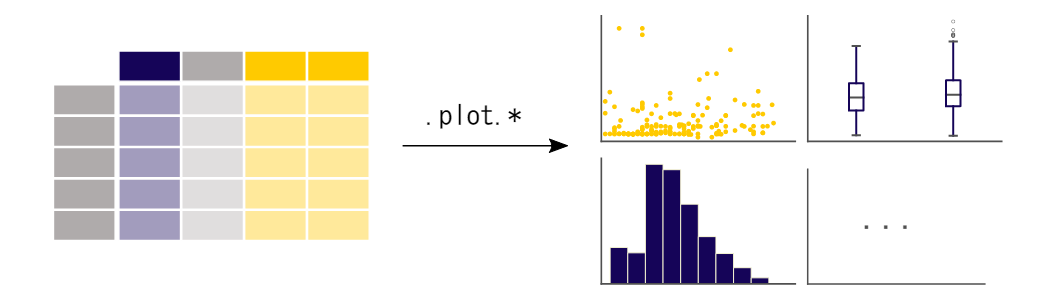

<font color=gray>※この章では、py-openaqパッケージを使用してopenaqから提供されているNO<sub>2</sub>に関する大気質データを使用します。[air_quality_no2.csvデータセット](https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2.csv)は、パリ、アントワープ、ロンドンにあるFR04014、BETR801、London Westminsterの各測定ステーションのNO<sub>2</sub>値を提供します。。</font>

In [ ]:
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2.csv"
air_quality = pd.read_csv(url, index_col=0, parse_dates=True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


---
[ノート]  
read_csv 関数の index_col および parse_dates パラメータを使用して、最初の（0 番目の）列を結果の DataFrame のインデックスとして定義し、列内の日付をそれぞれ Timestamp オブジェクトに変換します。
---

<font color=navy size=4>【ユースケース１７】</font>  
> データを素早く視覚的に確認したい

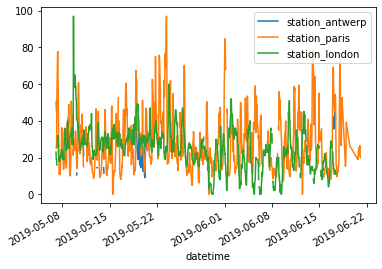

In [ ]:
air_quality.plot()

>DataFrameの場合、pandasはデフォルトで、数値データを持つ各列に1つのラインプロットを作成します。

<font color=navy size=4>【ユースケース１８】</font>  
> データテーブルのパリのデータ列だけでプロットしたい。

In [ ]:
air_quality["station_paris"].plot()

> 特定の列をプロットするには、サブセット・データ・チュートリアルでの選択メソッドとplot()メソッドを組み合わせて使用します。したがって、plot()メソッドはSeriesとDataFrameの両方で動作します。

<font color=navy size=4>【ユースケース１９】</font>  
> ロンドンとパリで測定されたN0<sub>2</sub>の値を視覚的に比較してみたい

In [ ]:
air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5)

plot 関数を使用したデフォルトの折れ線グラフ以外にも、データをプロットするための様々な方法が用意されています。ここでは、標準的なPythonを使って、利用可能なプロット方法の概要を説明します。

In [ ]:
[
    method_name
    for method_name in dir(air_quality.plot)
    if not method_name.startswith("_")
]

---
[ノート]  
PythonやJupyter Notebookだけでなく、多くの開発環境では、TABボタンを使って利用可能なメソッドの概要を知ることができます。  
例えば、 air_quality.plot. + TABキー です。
---

オプションの1つにDataFrame.plot.box()がありますが、これは「箱ひげ図」を意味しています。boxメソッドは、大気質の例のデータに適用できます。

In [ ]:
air_quality.plot.box()

<font color=olive>デフォルトのラインプロット以外のプロットについては、ユーザーガイドの[「サポートされているプロットスタイル」](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-other)のセクションを参照してください。

<font color=navy size=4>【ユースケース２０】</font>  
> それぞれの列を別のサブプロットにしたい。

In [ ]:
axs = air_quality.plot.area(figsize=(12, 4), subplots=True)

> プロット関数のsubplots引数では、データ列ごとの個別のサブプロットがサポートされています。pandasの各プロット関数に用意されている組み込みオプションを確認しておきましょう。

<font color=olive>さらにいくつかのフォーマットオプションについては、ユーザーガイドの[「プロットのフォーマット」](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-formatting)の項で説明しています。</font>

<font color=navy size=4>【ユースケース２１】</font>  
> できあがったプロットをさらにカスタマイズしたり、拡張したり、保存したりしたい。

In [ ]:
import matplotlib.pyplot as plt            # matplotlibをインポート
fig, axs = plt.subplots(figsize=(12, 4))   

air_quality.plot.area(ax=axs)               # matplot上のオブジェクト上に描画
axs.set_ylabel("NO$_2$ concentration")      # y軸のラベルを設定、その他さまざまなmatplotlibの機能が使えます

fig.savefig("no2_concentrations.png")       # matplotlibの機能を使って画像の保存、DIR直下にpngファイルが生成されます

pandasによって作成されるプロットオブジェクトのそれぞれは、matplotlibオブジェクトです。Matplotlibはプロットをカスタマイズするための多くのオプションを提供しているので、pandasとMatplotlibの間のリンクを明示することで、matplotlibのすべての機能を作成するプロットに反映させることができます。この戦略はこの例で適用しています。

### <font color='orange' size=5> ５章で覚えたこと</font>
+ <font size=4> `.plot.*` メソッドはSeriesとDataFramesの両方に適用できる</font>  
&nbsp;
+ <font size=4>デフォルトでは，列のそれぞれが異なる要素（line, boxplot,...）としてプロットされる</font>  
&nbsp;
+ <font size=4>pandasで作成されたプロットは，すべてMatplotlibオブジェクトである</font>

<font color=olive>pandasでのプロッティングの概要は、[visualizationのページ](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization)に記載されています。</font>

# <font color=blue>6.既存のカラムから派生して新しいカラムを作成するには？ </font>
  
&nbsp;  
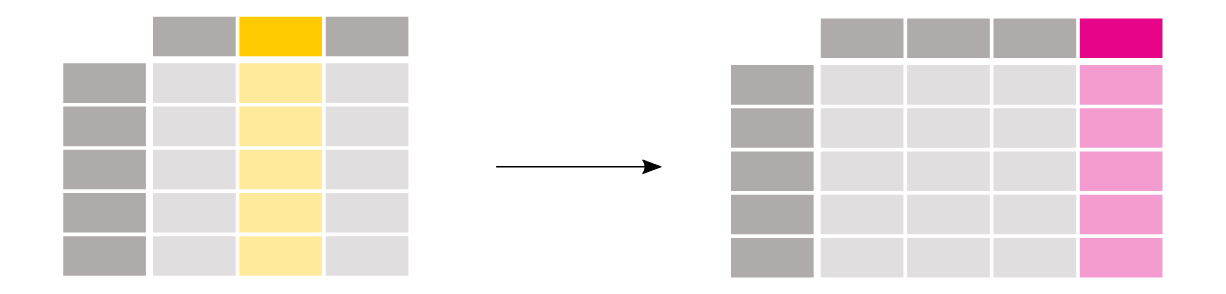

<font color=navy size=4>【ユースケース２２】</font>  
> ロンドンの駅の NO<sub>2</sub> 濃度を mg/m<sup>3</sup> で表現したい  
 (温度を 25℃、圧力を1013 hPaとすると、換算係数は1.882）

In [ ]:
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
air_quality.head()

> 新しいカラムを作成するには、左辺の括弧 [] 内に新しいカラム名を指定します。

---
[ノート]  
値の計算はelement_wiseで行われます。つまり、指定された列のすべての値に、一度に1.882という値が掛けられます。ループを使って各行を反復する必要はありません。
---

<font color=navy size=4>【ユースケース２３】</font>  
> パリとアントワープの値の比率を調べて、その結果を新しい列に保存したい。

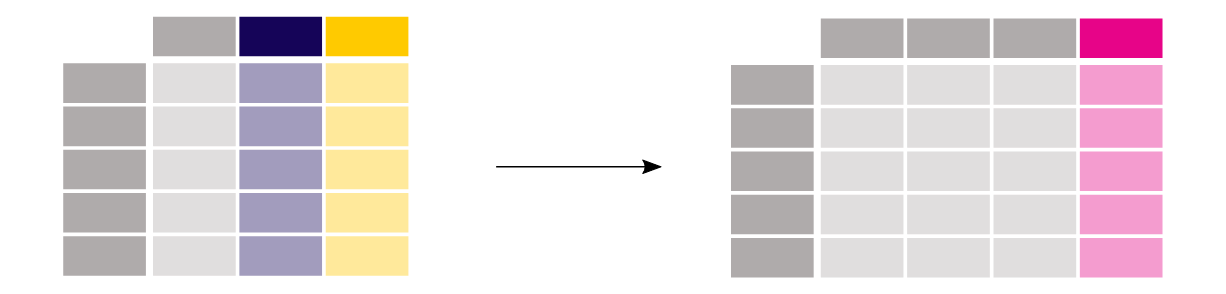

In [ ]:
air_quality["ratio_paris_antwerp"] = (
    air_quality["station_paris"] / air_quality["station_antwerp"]
)
air_quality.head()

>計算は同様に要素ごとに行われるので、各行の値に対して / が適用されます。

また、他の数学演算子（+、-、\*、/）や論理演算子（<、>、=、...）も要素ごとに動作します。後者は、条件式を使用してテーブルの行をフィルタリングするために、サブセットデータのチュートリアルですでに使用しています。

より高度なロジックが必要な場合は、[apply()メソッド](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply)で任意のPythonコードを使用することができます。

<font color=navy size=4>【ユースケース２４】</font>  
> データカラムの名前を、openAQで使用される対応するステーション識別子に変更したい

In [ ]:
air_quality_renamed = air_quality.rename(
    columns={
        "station_antwerp": "BETR801",
        "station_paris": "FR04014",
        "station_london": "London Westminster",
    }
)

air_quality_renamed.head()

> rename()関数は、行ラベルと列ラベルの両方に使用することができます。現在の名前をキーに、新しい名前を値に持つ辞書を用意して、対応する名前を更新します。

マッピングは固定名のみに限定されるべきではなく、マッピング関数を使うことも可能です。例えば、カラム名を小文字に変換することも関数を使って行うことができます。

In [ ]:
air_quality_renamed = air_quality_renamed.rename(columns=str.lower)
air_quality_renamed.head()

<font color=olive>列や行のラベルの名前の変更については、ユーザーガイドの[「ラベルの名前の変更」](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-rename)の項を参照してください。

### <font color='orange' size=5> ６章で覚えたこと</font>
+ <font size=4>出力をDataFrameに割り当て、[] の間に新しいカラム名を入れて、新しいカラムを作成する</font>  
&nbsp;
+<font size=4>操作は要素ごとに行われるので、行をループする必要はない</font>  
&nbsp;
+<font size=4>行ラベルや列の名前を変更するには、辞書や関数と一緒に rename 関数を使用する</font>

<font color=olive>ユーザーガイドには、[カラムの追加と削除](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#basics-dataframe-sel-add-del)に関する別のセクションがあります。

# <font color=blue>7.要約統計量を計算するには？ </font>  
  
## 統計情報の集計

&nbsp;
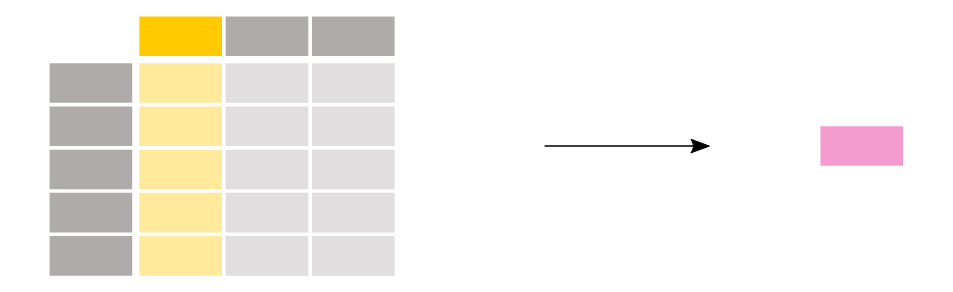

<font color=navy size=4>【ユースケース２５】</font>  
> タイタニックの乗客の平均年齢は何歳？

In [ ]:
titanic["Age"].mean()

さまざまな統計情報が用意されており数値データのある列に適用することができます。一般的な操作では<font color=red>欠損データは除外され</font>、デフォルトでは行単位で操作されます。

<font color=navy size=4>【ユースケース２６】</font>  
> タイタニックの乗客の年齢とチケット料金の中央値を知りたい  
  
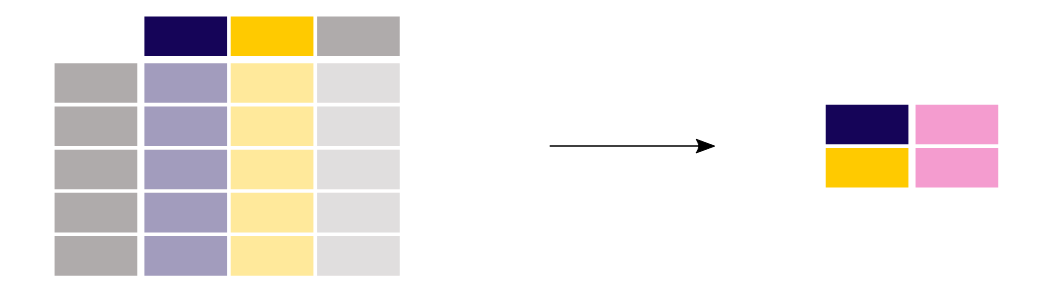

In [ ]:
titanic[["Age", "Fare"]].median()

> DataFrameの複数の列に適用された統計値（2つの列を選択してDataFrameを返す、サブセットデータのチュートリアルを参照）は、数値列ごとに計算されます。

集計統計量は、複数の列に対して同時に計算することができます。最初のチュートリアルで説明したdescribe関数を覚えていますか？

In [ ]:
titanic[["Age", "Fare"]].describe()

事前に定義された統計値の代わりに、DataFrame.agg()メソッドを使用して、指定された列の統計値を集約する特定の組み合わせを定義することができます。

In [ ]:
titanic.agg(
    {
        "Age": ["min", "max", "median", "skew"],
        "Fare": ["min", "max", "median", "mean"],
    }
)

<font color=olive>記述統計量の詳細は、ユーザーガイドの[記述統計量](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-stats)の項に記載されています。</font>

## カテゴリー別に分類された統計情報を集約  
  
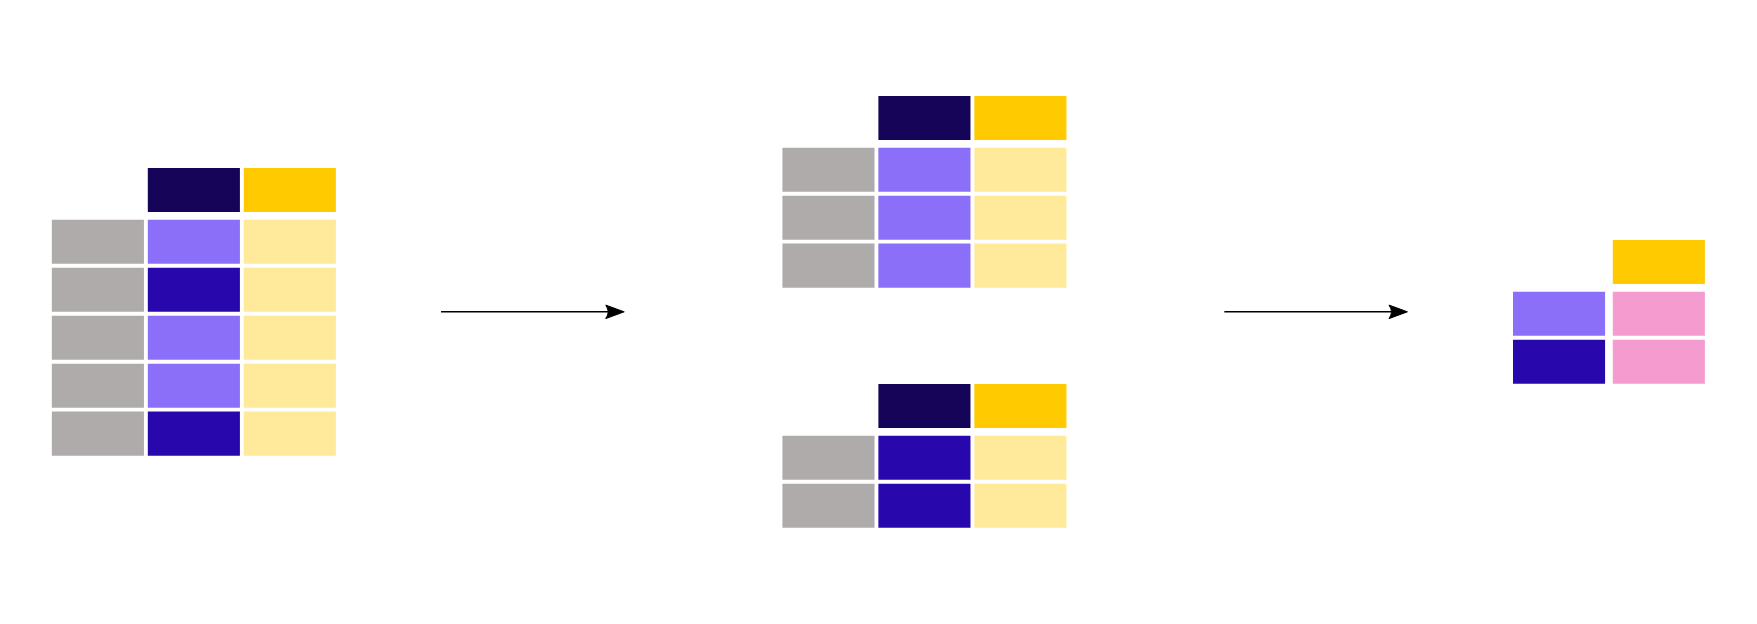

<font color=navy size=4>【ユースケース２７】</font>  
> タイタニックの乗客の男性と女性の平均年齢は？

In [ ]:
titanic[["Sex", "Age"]].groupby("Sex").mean()

> 今回の目的は各性別の平均年齢なので、まずこの2つの列をサブセレクションします：titanic[["Sex", "Age"]]。次に、Groupby()メソッドをSexカラムに適用して、カテゴリーごとのグループを作ります。そして、各性別の平均年齢を計算して返します。

与えられた統計量（平均年齢など）を、列の各カテゴリー（Sex列の男性/女性など）について計算することは、よくあるパターンです。groupbyメソッドはこの種の操作をサポートするために使用されます。より一般的には、split-apply-combineパターンに当てはまります。
  
+ データをグループに分ける
+ 各グループに独立して関数を適用する
+ 結果を一つのデータ構造にまとめる
  
適用と結合のステップは、pandasでは通常一緒に行われます。

先ほどの例では、まず2列を明示的に選択しました。そうでない場合は、数値列を含む各列に meanメソッド が適用されます。

In [ ]:
titanic.groupby("Sex").mean()

Pclassの平均値を求めてもあまり意味がありません。各性別の平均年齢にのみ興味がある場合、列の選択（通常通り角括弧 [] ）はグループ化されたデータでもサポートされます。

In [ ]:
titanic.groupby("Sex")["Age"].mean()

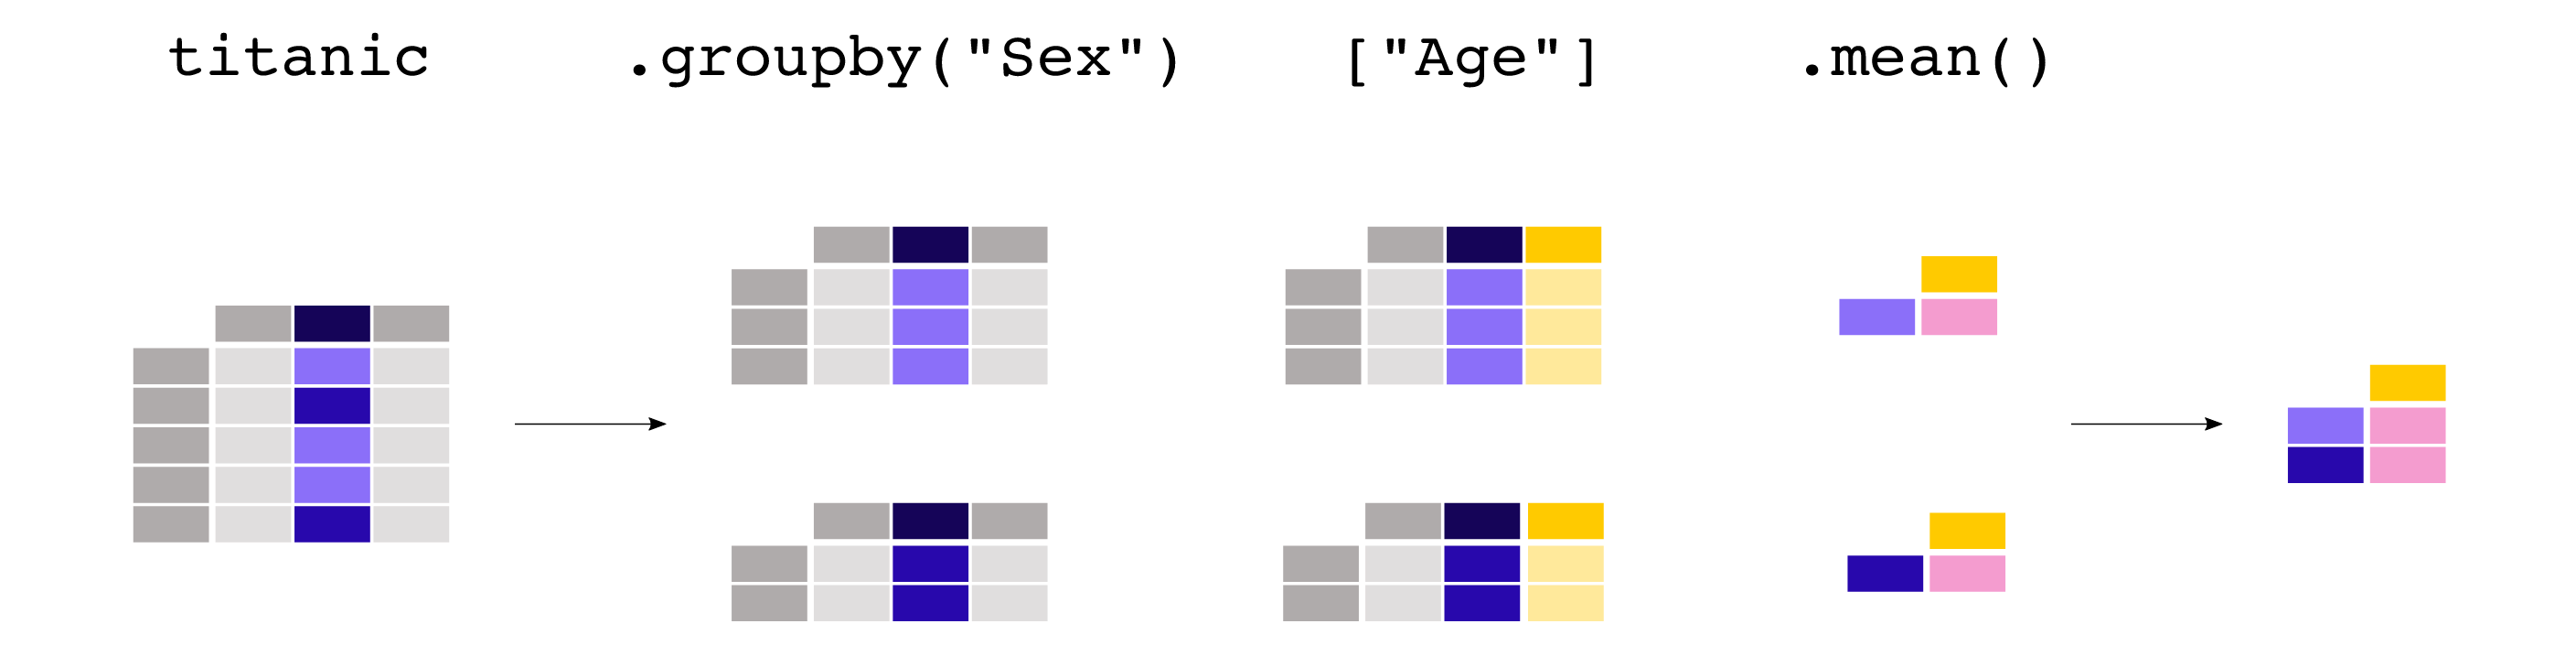

---
[ノート]
Pclass列には数値データが含まれていますが、実際には「1」、「2」、「3」というラベルを持つ3つのカテゴリー（またはファクター）を表しています。これらの統計値を計算してもあまり意味がありません。そこでpandasでは、このようなデータを扱うためにCategoricalデータ型を用意しています。詳細は、ユーザーガイドの[「カテゴリーデータ」](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical)の項を参照してください。
---

<font color=navy size=4>【ユースケース２８】</font>  
> 性別とキャビンクラスの組み合わせごとに、航空券の平均運賃価格は？

In [ ]:
titanic.groupby(["Sex", "Pclass"])["Fare"].mean()

> グループ化は、複数の列で同時に行うことができます。groupby()メソッドにカラム名をリストとして与えます。

<font color=olive>split-apply-combineアプローチの詳細については、ユーザーガイドの[groupby operations](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby)の項を参照してください。</font>

## カテゴリ別のレコード数をカウントする  
  
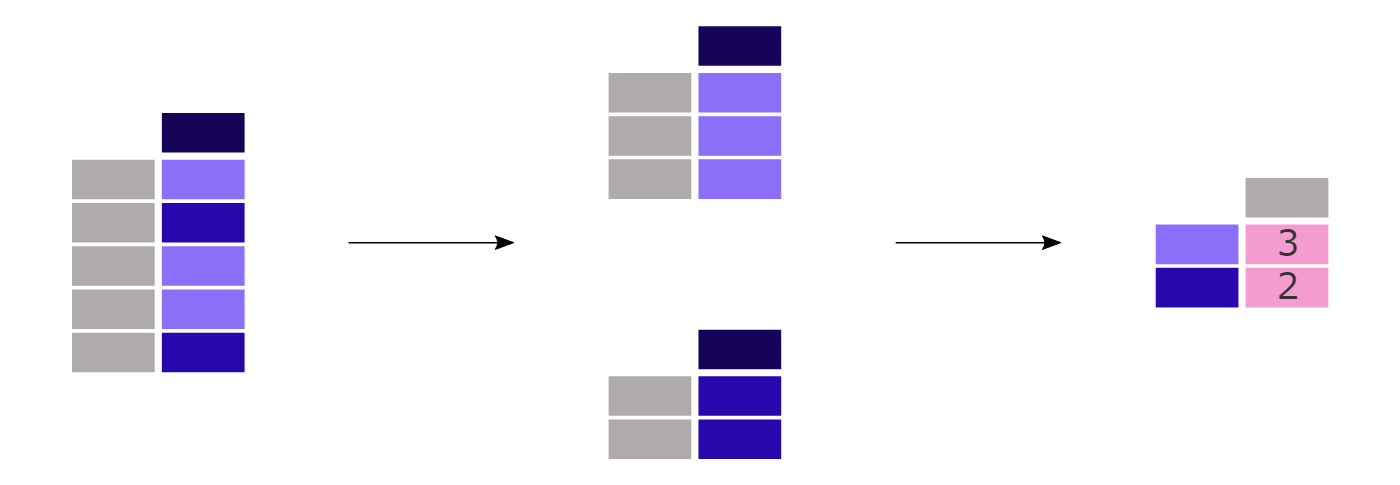  

<font color=navy size=4>【ユースケース２９】</font>  
> それぞれのキャビンクラスの乗客数は？

In [ ]:
titanic["Pclass"].value_counts()

> [value_counts()メソッド](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html#pandas.Series.value_counts)は、カラム内の各カテゴリーのレコード数をカウントします。

この関数は、実際には groupby 演算と、各グループ内のレコード数のカウントを組み合わせたものであるため、ショートカットになっています。

In [ ]:
titanic.groupby("Pclass")["Pclass"].count()

---
[ノート]
sizeとcountはどちらもgroupbyと組み合わせて使うことができます。sizeはNaN値を含み、単に行数（テーブルのサイズ）を提供するのに対し、countは欠損値を除外します。value_countsメソッドでは、dropna引数を使用して、NaN値を含むかどうかを指定します。
---

<font color=olive>ユーザーガイドにはvalue_countsに関する専用のセクションがあり、[離散化](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-discretization)に関するページを参照してください。

### <font color='orange' size=5> ７章で覚えたこと</font>
+ <font size=4>列や行全体を対象とした集約統計が可能</font>  
&nbsp;
+ <font size=4>groupby は、分割・適用・結合のパターンを提供する</font>  
&nbsp;
+ <font size=4>value_countsは、変数の各カテゴリのエントリ数をカウントする便利なショートカット</font>

<font color=olive>split-apply-combineアプローチの詳細については、ユーザーガイドの [groupby操作](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby) のページを参照してください。</font>

# <font color=blue>8.テーブルのレイアウトを変更するには？ </font>

## テーブルの行を並べ替える

<font color=navy size=4>【ユースケース３０】</font>  
> タイタニック号のデータを乗客の年齢に応じてソートしたい。

In [ ]:
titanic.sort_values(by="Age").head()

<font color=navy size=4>【ユースケース３１】</font>  
> タイタニック号のデータを、キャビンクラスと年齢に応じて降順に並べ替えたい。

In [ ]:
titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head()

> Series.sort_values()を使用すると、テーブルの行は定義されたカラムに基づいてソートされます。インデックスは、行の順序に従います。

<font color=olive>テーブルのソートについての詳細は、使用ガイドの[「データのソート」](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-sorting)の項を参照してください。</olive>

## ロング形式からワイド形式のテーブルフォーマット

ここでは、大気質データセットの小さなサブセットを使用してみましょう。ここでは、NO<sub>2</sub>データに焦点を当て、各場所の最初の2つの測定値（つまり、各グループの先頭）のみを使用します。このデータのサブセットはno2_subsetと呼びます。

In [ ]:
# データ（air_quality_long.csv）のロード　
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_long.csv"
air_quality = pd.read_csv(url, index_col="date.utc", parse_dates=True)
air_quality.head()

In [ ]:
# filter for no2 data only
no2 = air_quality[air_quality["parameter"] == "no2"]

In [ ]:
# use 2 measurements (head) for each location (groupby)
no2_subset = no2.sort_index().groupby(["location"]).head(2)
no2_subset

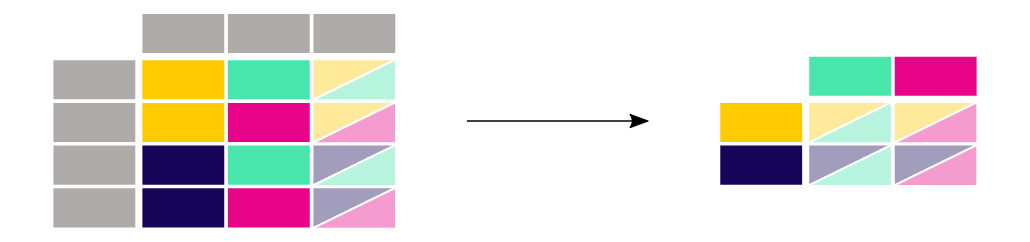

<font color=navy size=4>【ユースケース３２】</font>  
> 3つの観測所の値を隣り合った別の列にしたい

In [ ]:
no2_subset.pivot(columns="location", values="value")

> [pivot()関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot.html#pandas.pivot)は、純粋にデータを再形成するもので、インデックスと列の組み合わせごとに1つの値が必要となります。

pandasは複数列のプロッティングをサポートしているので（[プロッティングのチュートリアル](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/04_plotting.html#min-tut-04-plotting)を参照）、long table形式からwide table形式に変換することで、異なる時系列を同時にプロッティングすることができます。

In [ ]:
no2.head()

In [ ]:
no2.pivot(columns="location", values="value").plot()

---
[ノート]  
indexパラメータが定義されていない場合は、既存のインデックス（行ラベル）が使用されます。
---

<font color=olive> [pivot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html#pandas.DataFrame.pivot) の詳細については、ユーザーガイドの[「DataFrameオブジェクトのピボット」](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-reshaping)の項を参照してください。

## Pivotテーブル  
  
&nbsp;
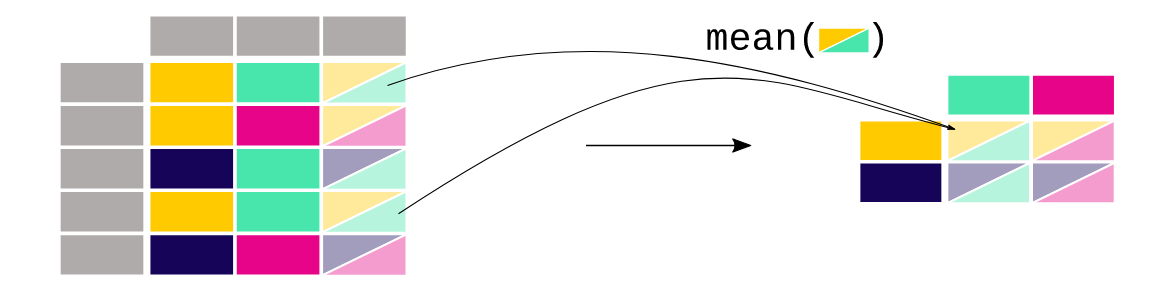

<font color=navy size=4>【ユースケース３３】</font>  
> 各観測点におけるNO<sub>2</sub> と PM<sub>2.5</sub> の平均濃度を表形式で求めたい。

In [ ]:
air_quality.pivot_table(
    values="value", index="location", columns="parameter", aggfunc="mean"
)

> pivot()の場合、データは並べ替えられるだけです。複数の値を集約する必要がある場合（この例では、異なるタイムステップの値）、pivot_table()を使用して、これらの値を結合する方法に関する集約関数（例：mean）を提供しています。

ピボットテーブルは、表計算ソフトではよく知られた概念です。各変数のサマリー欄も個別に表示させたい場合は、marginパラメータをTrueにします。

In [ ]:
air_quality.pivot_table(
    values="value",
    index="location",
    columns="parameter",
    aggfunc="mean",
    margins=True,
)

<font color=olive>[pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html#pandas.DataFrame.pivot_table) の詳細については、ユーザーガイドの[ピボット・テーブル](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-pivot)の項を参照してください。</font>

---
[ノート]  
因みに、pivot_table()は確かにgroupby()に直結しています。パラメータとロケーションの両方でグループ化しても、同じ結果が得られます。  
`air_quality.groupby(["parameter", "location"]).mean()`  
---

<font color=olive>[groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby) と[unstack()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack) の組み合わせについては、ユーザーガイドの[「statsとgroupbyの組み合わせ」](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-combine-with-groupby)のセクションをご覧ください。</font>

## ワイド形式からロング形式フォーマット  
  
前節で作成したワイドフォーマットの表から再開します。

In [ ]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()
no2_pivoted.head()

<font color=navy size=4>【ユースケース３４】</font>  
> すべての大気中のNO2測定値を1つのカラムに集めたい（ロングフォーマット）  
 
&nbsp; 
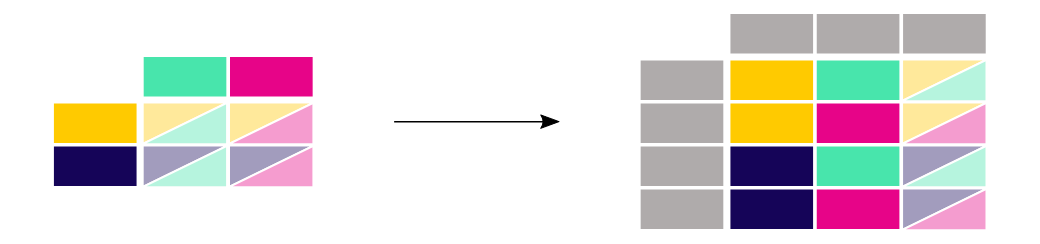

In [ ]:
no_2 = no2_pivoted.melt(id_vars="date.utc")
no_2.head()

DataFrameのpandas.melt()メソッドは、データテーブルをワイドフォーマットからロングフォーマットに変換します。カラムのヘッダは、新しく作成されたカラムの変数名になります。

解決策は、pandas.melt()を適用する方法の短いバージョンです。このメソッドは、id_varsに記載されていないすべての列を2つの列にまとめます。カラムヘッダの名前を持つカラムと、値そのものを持つカラムです。後者の列はデフォルトで名前の値を取得します。  
  
[pandas.melt()メソッド](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html#pandas.melt)は、より詳細に定義することができます。

In [ ]:
no_2 = no2_pivoted.melt(
    id_vars="date.utc",
    value_vars=["BETR801", "FR04014", "London Westminster"],
    value_name="NO_2",
    var_name="id_location",
)
no_2.head()

結果は同じですが、より詳細に定義されています。  
  
+ value_vars は、どのカラムを一緒に溶かすかを明示的に定義します。
+ value_name は、デフォルトのカラム名 value の代わりに、values カラムのカスタムカラム名を提供します。
+ var_name は、カラムヘッダ名を収集するカラムのカスタムカラム名を提供します。それ以外の場合は、インデックス名またはデフォルトの変数を取ります。
  
したがって、引数value_nameとvar_nameは、生成された2つのカラムに対する単なるユーザー定義名です。溶かすカラムはid_varsとvalue_varsで定義されます。

<font color=olive> [pandas.melt()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html#pandas.melt) によるワイドフォーマットからロングフォーマットへの変換については、ユーザーガイドの[「meltによるリシェイピング」](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html#pandas.melt)のセクションで説明されています。</font>

### <font color='orange' size=5> ８章で覚えたこと</font>
+ <font size=4>1つまたは複数の列でのソートはsort_valuesでサポート</font>  
&nbsp;
+ <font size=4>ピボット関数は純粋にデータを再構築するものですが、pivot_tableは集約をサポート</font>
&nbsp;
+ <font size=4>pivotの逆（ロング形式からワイド形式）はmelt（ワイド形式からロング形式）</font>

<font color=olive>概要については、ユーザーガイドの[リシェイピングとピボット](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping)のページを参照してください。</font>

# <font color=blue>9.複数のテーブルのデータを結合するには？ </font>
  
<font clor=gray>この章では、NO<sub>2</sub> に関する大気質データを使用します。
air_quality_no2_long.csvデータセットは、パリ、アントワープ、ロンドンにあるFR04014、BETR801、London Westminsterの各測定ステーションのNO<sub>2</sub>値を提供します。  
また、2.5マイクロメートル以下の粒子状物質に関する大気質データを使用しています。
air_quality_pm25_long.csvデータセットは、FR04014、BETR801、London Westminsterの各測定ステーション（Paris、Antwerp、London）のPM<sub>25</sub> 値を提供します。</font>

In [ ]:
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2_long.csv"

air_quality_no2 = pd.read_csv(url, parse_dates=True)
air_quality_no2 = air_quality_no2[["date.utc", "location",
                                   "parameter", "value"]]
air_quality_no2.head()

In [ ]:
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_pm25_long.csv"

air_quality_pm25 = pd.read_csv(url, parse_dates=True)
air_quality_pm25 = air_quality_pm25[["date.utc", "location",
                                     "parameter", "value"]]
air_quality_pm25.head()

## オブジェクトの連結  
  
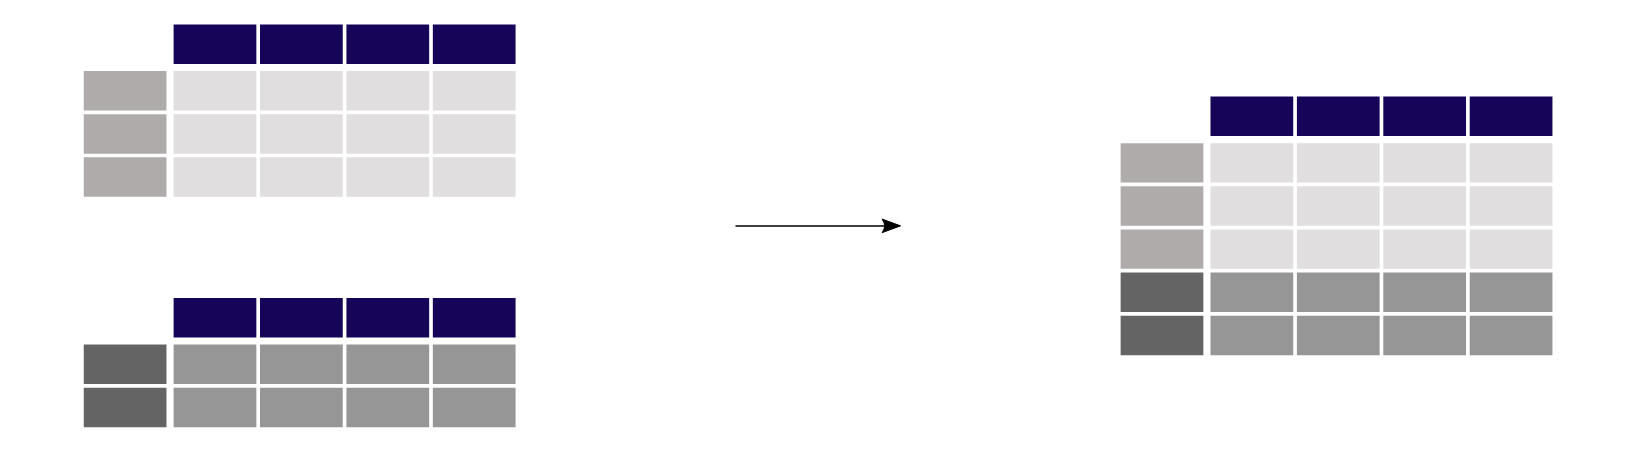

<font color=navy size=4>【ユースケース３５】</font>  
> 似たような構造を持つ2つのテーブル、NO<sub>2</sub> と PM<sub>25</sub> の測定値を1つのテーブルにまとめたい

In [ ]:
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)
air_quality.head()

[concat()関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat)は、複数のテーブルをいずれかの軸（行単位または列単位）に沿って連結する操作を行います。

デフォルトでは、連結は軸0に沿って行われるので、結果のテーブルは入力テーブルの行を組み合わせたものになります。元のテーブルと連結されたテーブルの形状を確認して、動作を確認してみましょう。

In [ ]:
print('Shape of the ``air_quality_pm25`` table: ', air_quality_pm25.shape)

In [ ]:
print('Shape of the ``air_quality_no2`` table: ', air_quality_no2.shape)

In [ ]:
print('Shape of the resulting ``air_quality`` table: ', air_quality.shape)

したがって、結果として得られるテーブルは、3178行（= 1110 + 2068）となります。

---
[ノート]  
axis 引数は、軸に沿って適用可能な多くの pandas メソッドを返します。DataFrameには、2つの対応する軸があります。1つ目は、行を垂直に下向きに走る軸（軸0）で、2つ目は、列を水平に走る軸（軸1）です。連結や要約統計などのほとんどの操作は、デフォルトでは行（軸0）に沿って行われますが、列に沿っても適用できます。
---

datetime情報でテーブルをソートすると、両テーブルの組み合わせも図示され、パラメータカラムでテーブルの起源が定義されます（テーブルair_quality_no2からのno2またはテーブルair_quality_pm25からのpm25のいずれか）。

In [ ]:
air_quality = air_quality.sort_values("date.utc")
air_quality.head()

この例では、dataが提供するパラメータ列により、元のそれぞれのテーブルが確実に特定されます。しかし、必ずしも特定されるとは限りません。concat関数は、keys引数を使って、追加の（階層的な）行インデックスを追加する便利なソリューションを提供しています。  
例えば、

In [ ]:
air_quality_ = pd.concat([air_quality_pm25, air_quality_no2], keys=["PM25", "NO2"])
air_quality_.head()

---
[ノート]  
これらのチュートリアルでは、複数の行/列のインデックスが同時に存在することについては言及されていません。階層的インデックスやマルチインデックスは、高次元のデータを分析するための高度で強力なpandasの機能です。  
マルチインデックスについては、今回のpandasの紹介では触れません。とりあえず、関数reset_indexを使って、インデックスの任意のレベルを列に変換できることを覚えておいてください（例：air_quality.reset_index(level=0) ）  
<font color=olive>ユーザーガイドの[「高度なインデックス作成」](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced)では、マルチインデックスの世界をご紹介していますので、ぜひご覧ください。</font>  
---

<font color=olive>テーブルの連結（行および列単位）に関するオプションや、他の軸上のインデックスの論理（結合または交差）を定義するために concat を使用する方法については、[「オブジェクトの連結」](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-concat)のセクションで説明しています。</font>

## 共通の識別子でテーブルを結合  
  
&nbsp;
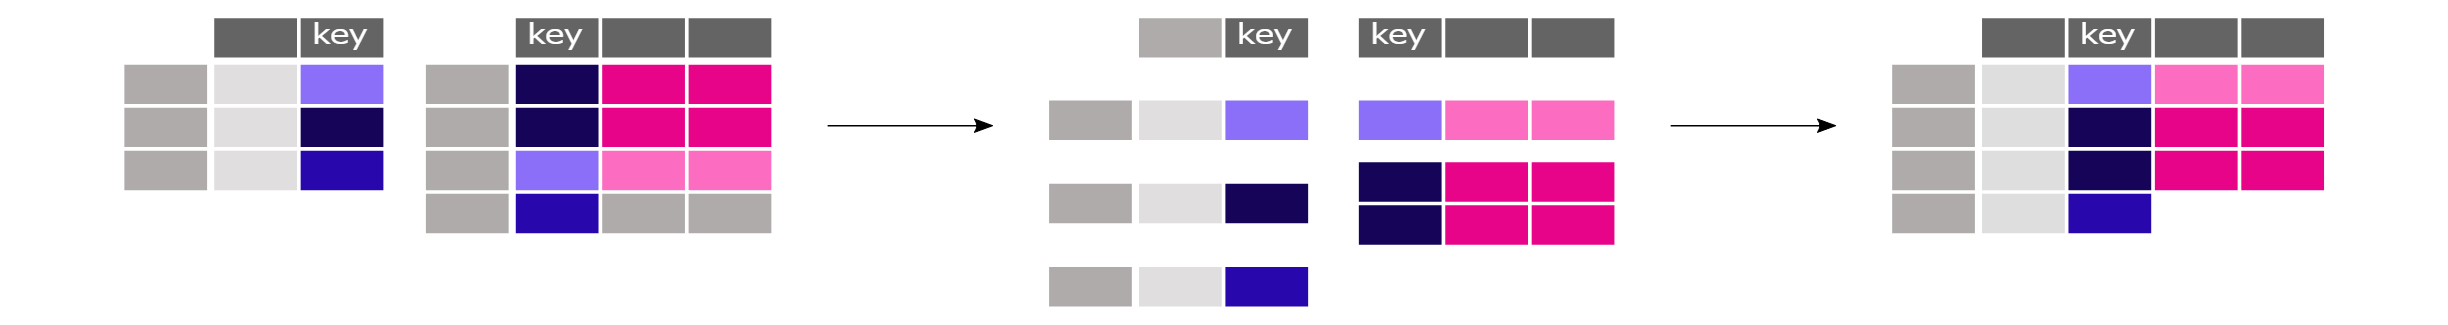

<font color=navy size=4>【ユースケース３６】</font>  
>ステーションのメタデータ・テーブルで提供されるステーションの座標を、測定値テーブルの対応する行に追加します。  
<font color=gray>※大気質測定ステーションの座標は、py-openaqパッケージでダウンロードしたデータファイルair_quality_stations.csvに格納されています。</font>

In [ ]:
stations_coord = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_stations.csv")
stations_coord.head()

>---
[ノート]  
この例で使用したステーション（FR04014、BETR801、London Westminster）は、メタデータテーブルに列挙された3つのエントリーに過ぎません。この3つの座標を測定値テーブルに追加し、それぞれをair_qualityテーブルの対応する行に追加するだけです。
>---

In [ ]:
air_quality.head()

In [ ]:
air_quality = pd.merge(air_quality, stations_coord, how="left", on="location")
air_quality.head()

> merge()関数を使用して、air_qualityテーブルの各行に、対応する座標をair_quality_stations_coordテーブルから追加します。両テーブルには共通してlocationという列があり、これが情報を結合するためのキーとして使用されます。左結合を選択すると、air_quality(左)テーブルで利用可能なロケーション、すなわちFR04014、BETR801、London Westminsterのみが結果テーブルに入ります。マージ機能は、データベーススタイルの操作と同様に、複数の結合オプションをサポートしています。

<font color=navy size=4>【ユースケース３７】</font>  
>パラメータメタデータテーブルで提供されるパラメータの完全な説明と名前を、測定値テーブルに追加する  
<font color=gray>大気質パラメータのメタデータは、py-openaqパッケージでダウンロードしたデータファイルair_quality_parameters.csvに格納されています。</font>

In [ ]:
air_quality_parameters = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_parameters.csv")
air_quality_parameters.head()

In [ ]:
air_quality = pd.merge(air_quality, air_quality_parameters,
                      how='left', left_on='parameter', right_on='id')

air_quality.head()

先ほどの例と比べると、共通のカラム名がありません。しかし、air_qualityテーブルのparameterカラムとair_quality_parameters_nameのidカラムは、どちらも測定された変数を共通のフォーマットで提供しています。ここでは、2つのテーブル間のリンクを作るために、（単なるonではなく）left_onとright_onの引数が使われています。

<font color=olive>pandasは、内側結合、外側結合、右結合もサポートしています。テーブルの結合/マージについての詳細は、ユーザーガイドの[「データベーススタイルのテーブルのマージ」](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-join)のセクションに記載されています。また、[SQLとの比較](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html#compare-with-sql-join)のページも参照してください。</font>

### <font color='orange' size=5> ９章で覚えたこと</font>
+ <font size=4>複数のテーブルを列単位、行単位で連結するには、concat関数を使用する</font>  
&nbsp;
+ <font size=4>データベースのようにテーブルを結合するには、merge関数を使用する</font>

<font color=olive>[データテーブルを組み合わせるためのさまざまな機能](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging)の詳細については、ユーザーガイドを参照してください。

# <font color=blue>10.時系列データを簡単に扱うには？ </font>

<font color=gray>※この章では、NO<sub>2</sub>と2.5マイクロメートル以下の粒子状物質に関する大気質データを使用しています。air_quality_no2_long.csv "データセットは、パリ、アントワープ、ロンドンにあるFR04014、BETR801、London Westminsterの各測定ステーションのNO2値を提供します。</font>

In [ ]:
#データ（air_quality_long.csv）の再ロード　
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2_long.csv"
air_quality = pd.read_csv(url)

air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality.head()

## pandasのdatetimeプロパティの使用

<font color=navy size=4>【ユースケース３８】</font>  
> datetime列の日付を、プレーンテキストではなくdatetimeオブジェクトとして扱いたい

In [ ]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality["datetime"]

> 初期状態では、datetimeの値は文字列であり、datetimeの操作（年の抽出、曜日の抽出...など）はできません。to_datetime関数を適用することで、pandasは文字列を解釈し、これらをdatetime(すなわちdatetime64[ns, UTC])オブジェクトに変換します。pandasでは、これらのdatetimeオブジェクトを、標準ライブラリのdatetime.datetimeと同様に、[pandas.Timestamp](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html#pandas.Timestamp) と呼んでいます。

---
[ノート]  
多くのデータセットでは、カラムの1つに日付情報が含まれています。pandas.read_csv()やpandas.read_json()などのpandas入力関数では、parse_datesパラメータにTimestampとして読み込むカラムのリストを指定することで、データを読み込む際に日付への変換を行うことができます。
`pd.read_csv("../data/air_quality_no2_long.csv", parse_dates=["datetime"])`
---

これらの [pandas.Timestampオブジェクト](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html#pandas.Timestamp)はなぜ有用なのでしょうか？いくつかの例を挙げて、その付加価値を説明しましょう。  
  
扱っている時系列データセットの開始日と終了日を教えてください？

In [ ]:
air_quality["datetime"].min(), air_quality["datetime"].max()

datetimesに [pandas.Timestamp](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html#pandas.Timestamp)を使用すると、日付情報を使って計算し、それらを比較することができます。そのため、これを使って時系列の長さを求めることができます。

In [ ]:
air_quality["datetime"].max() - air_quality["datetime"].min()

結果は [pandas.Timedeltaオブジェクト](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.html#pandas.Timedelta)で、Python標準ライブラリのdatetime.timedeltaに似ており、時間の継続時間を定義します。

<font color=olive>pandasでサポートされている様々な時間の概念は、ユーザーガイドの[「時間に関する概念」](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-overview)のセクションで説明されています。

<font color=navy size=4>【ユースケース３９】</font>  
> 計測した月のみを含む新しい列をDataFrameに追加したい。

In [ ]:
air_quality["month"] = air_quality["datetime"].dt.month
air_quality.head()

>日付にTimestampオブジェクトを使用することで、多くの時間関連のプロパティがpandasで提供されます。例えば、月はもちろん、年、今年の週、四半期などです。これらのプロパティはすべて dt アクセサでアクセスできます。

<font color=olive>既存の日付プロパティの概要は、[「時刻と日付のコンポーネントの概要」](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-components)の表に記載されています。datetime のようなプロパティを返す dt アクセサの詳細については、[dt アクセサ](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dt-accessors)の項で説明します。</font>

<font color=navy size=4>【ユースケース４０】</font>  
> 各測定場所の各曜日の平均NO2濃度は？

In [ ]:
air_quality.groupby(
    [air_quality["datetime"].dt.weekday, "location"])["value"].mean()

> 統計計算のチュートリアルで紹介したgroupbyによるsplit-apply-combineパターンを覚えていますか？ここでは、平日ごと、測定場所ごとに、与えられた統計量（例：NO<sub>2</sub>の平均値）を計算したいとします。平日にグループ化するために、pandas Timestampのdatetimeプロパティweekday（月曜＝0、日曜＝6）を使用していますが、これはdtアクセサでもアクセス可能です。場所と平日の両方でグループ化することで、これらの組み合わせごとに平均値の計算を分割することができます。  
  
><font color=color>注意！</font>　これらの例では非常に短い時系列を扱っているため、この分析は長期的な代表結果を提供するものではありません。

<font color=navy size=4>【ユースケース４１】</font>  
> すべての観測所の時系列をまとめて、日中の典型的なNO2のパターンをプロットする。言い換えれば、1日の各時間の平均値はどのくらいかを見たい

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))

air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(
    kind='bar', rot=0, ax=axs
)

plt.xlabel("Hour of the day")  # custom x label using matplotlib
plt.ylabel("$NO_2 (µg/m^3)$")

> 先ほどのケースと同様に、1日の各時間ごとに与えられた統計値（例：NO<sub>2</sub>の平均値）を計算したいので、再びsplit-apply-combineアプローチを使用することができます。ここでは、pandas Timestamp の datetime プロパティ hour を使用していますが、dt accessorでもアクセスできます。

## インデックスとしてのDatetime  
  
[リシェイピングのチュートリアル](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/07_reshape_table_layout.html#min-tut-07-reshape)では、[pivot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot.html#pandas.pivot)を使って、各測定場所を個別の列としてデータテーブルをリシェイピングしました。

In [ ]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2.head()

---
[ノート]  
データをピボットすることで、datetimeの情報がテーブルのインデックスになりました。一般に、列をインデックスとして設定するには、set_index関数を使用します。
---

datetimeインデックス（DatetimeIndex）を使用すると、強力な機能性が得られます。例えば、時系列のプロパティを取得するための dtアクセサ は必要ありませんが、これらのプロパティはインデックスで直接利用できます。

In [ ]:
no_2.index.year, no_2.index.weekday

他の利点としては、時間帯のサブセットが便利であることや、プロット上で時間スケールが適応されることが挙げられます。これを私たちのデータに適用してみましょう。

<font color=navy size=4>【ユースケース４２】</font>  
> 5月20日から5月21日までの各観測所のNO2値をプロットする

In [ ]:
no_2["2019-05-20":"2019-05-21"].plot()

> datetimeに解析される文字列を提供することで、データの特定のサブセットをDatetimeIndexで選択することができます。

<font color=olive>DatetimeIndex と文字列を使用したスライスについての詳細は、[時系列インデックス](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-datetimeindex)のセクションを参照してください。

## 時系列を別の周波数に再サンプルする


<font color=navy size=4>【ユースケース４３】</font>  
> 現在の1時間ごとの時系列値を、各観測所の月間最大値に集約する

In [ ]:
monthly_max = no_2.resample("M").max()
monthly_max

日時インデックスを持つ時系列データで非常に強力な方法は、時系列を別の頻度に [resample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html#pandas.Series.resample) する機能です（例えば、2秒ごとのデータを5分ごとのデータに変換するなど）。

[resample()メソッド](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html#pandas.Series.resample)はgroupby演算に似ています。

+ 対象となる周波数を定義する文字列（例：M, 5H,...）を使用して、時間ベースのグルーピングを行います。
+ mean, max,...などの集計関数が必要です。

<font color=olive>時系列頻度の定義に使用されるエイリアスの概要は、[「オフセット・エイリアスの概要」](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)の表に記載されています。</olive>

定義されている場合、時系列の頻度は freq 属性で提供されます。

In [ ]:
monthly_max.index.freq

<font color=navy size=4>【ユースケース４４】</font>  
> 各観測所のNO<sub>2</sub>の日平均値をプロットする。

In [ ]:
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5))

<font color=olive>時系列リサンプリングの詳細については、ユーザーガイドの[「リサンプリング」](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-resampling)の項を参照してください。

### <font color='orange' size=5> １０章で覚えたこと</font>
+ <font size=4>有効な日付文字列は、to_datetime関数を使ってdatetimeオブジェクトに変換したり、読み取り関数の一部として使用することができる</font>  
&nbsp;
+ <font size=4>pandasのDatetimeオブジェクトは、dtアクセサを使用した計算、論理演算、便利な日付関連のプロパティをサポートしている</font>  
&nbsp;
+ <font size=4>DatetimeIndexは、これらの日付関連のプロパティを含み、便利なスライシングをサポートしている</font>  
&nbsp;
+ <font size=4>Resampleは、時系列の頻度を変更する強力な方法</font>

<font color=olive>時系列の概要については、[時系列と日付機能](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries)のページで説明しています。

# <font color=blue>11.テキストデータを操作するには？ </font>

<font color=gray>※このチュートリアルでは、CSV形式で保存されたタイタニックのデータセットを使用します。</font>

In [ ]:
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv'
titanic = pd.read_csv(url)

<font color=navy size=4>【ユースケース４５】</font>  
> 名前の文字をすべて小文字にする。

In [ ]:
titanic["Name"].str.lower()

> Name列の各文字列を小文字にするには、「Name」列を選択し（データの選択に関するチュートリアルを参照）、strアクセサを追加して、lowerメソッドを適用します。このように、各文字列は要素ごとに変換されます。

時系列チュートリアルのdatetimeオブジェクトがdtアクセサを持つのと同様に、strアクセサを使うと、いくつかの特殊な文字列メソッドが利用できます。これらのメソッドは，一般的には，単一要素に対応する組み込みの文字列メソッドと同じ名前ですが，列の各値に対して要素ごとに適用されます（要素ごとの計算を思い出してください）。

<font color=navy size=4>【ユースケース４６】</font>  
> カンマの前の部分を抽出して、乗客の姓を含む新しい列「Surname」を作成する

In [ ]:
titanic["Name"].str.split(",")

> Series.str.split()メソッドを使うと、それぞれの値が2つの要素からなるリストとして返されます。最初の要素はコンマの前の部分で、2番目の要素はコンマの後の部分です。

In [ ]:
titanic["Surname"] = titanic["Name"].str.split(",").str.get(0)
titanic["Surname"]

> 苗字を表す最初の部分（要素0）にのみ興味があるので、ここでもstrアクセサを使用し、[Series.str.get()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.get.html#pandas.Series.str.get)を適用して該当部分を抽出します。このように、文字列関数を連結することで、複数の関数を一度に組み合わせることができます。

<font color=olive>文字列の一部を抽出する方法については、ユーザーガイドの[「文字列の分割と置換」](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-split)の項で詳しく説明しています。

<font color=navy size=4>【ユースケース４７】</font>  
> タイタニック号に乗船していた伯爵夫人の乗客データを抽出する

In [ ]:
titanic["Name"].str.contains("Countess")

In [ ]:
titanic[titanic["Name"].str.contains("Countess")]

> (彼女の話に興味がある方は、[Wikipedia](https://en.wikipedia.org/wiki/No%C3%ABl_Leslie,_Countess_of_Rothes)をご覧ください！)

文字列メソッド Series.str.contains() は、列 Name の各値について、文字列に Countess という単語が含まれているかどうかを確認し、各値について True (Countess は名前の一部) または False (Countess は名前の一部ではない) を返します。この出力は、データのサブセットのチュートリアルで紹介した条件付き（ブーリアン）インデックスを使用して、データをサブセレクトするのに使用できます。タイタニック号にはCountessが1人しかいないので、結果として1つの行が得られます。

---
[ノート]  
Series.str.contains()メソッドやSeries.str.extract()メソッドが正規表現を受け付けるので、より強力な文字列の抽出が可能ですが、このチュートリアルでは対象外としています。
---

<font color=olive>文字列の一部を抽出する方法については、ユーザーガイドの[「文字列のマッチングと抽出」](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-extract)の項を参照してください。

<font color=navy size=4>【ユースケース４８】</font>  
> タイタニックの乗客の中で、最も長い名前を持つ人を抽出する

In [ ]:
titanic["Name"].str.len()

> 最長の名前を取得するためには、まずName列の各名前の長さを取得する必要があります。pandasの文字列メソッドを使って、Series.str.len()関数を各名前にごと（要素ごと）に適用されます。

In [ ]:
titanic["Name"].str.len().idxmax()

次に、名前の長さが最大となるテーブルの対応する位置、できればインデックスラベルを取得する必要があります。idxmax()メソッドはまさにそれを行います。これは文字列メソッドではなく、整数に適用されるため、strは使用されません。

In [ ]:
titanic.loc[titanic["Name"].str.len().idxmax(), "Name"]

行のインデックス名(307)と列のインデックス名(Name)をもとに、[サブセットのチュートリアル](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html)で紹介したloc演算子を使って選択を行います。

<font color=navy size=4>【ユースケース４９】</font>  
> 「性別(sex)」の列で、「男性(male)」の値を「M」に、「女性(female)」の値を「F」に置き換えます。

In [ ]:
titanic["Sex_short"] = titanic["Sex"].replace({"male": "M", "female": "F"})
titanic["Sex_short"]

> [replace()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html#pandas.Series.replace)は文字列メソッドではありませんが、マッピングやボキャブラリを使って特定の値を変換する便利な方法を提供します。このメソッドには、マッピング {from : to} を定義するための辞書が必要です。

---
[注意]  
特定の文字を置き換えるreplace()メソッドも用意されています。しかし、複数の値のマッピングを持つ場合、これは次のようになります。 
  
`titanic["Sex_short"] = titanic["Sex"].str.replace("female", "F")`  
`titanic["Sex_short"] = titanic["Sex_short"].str.replace("male", "M")` 
  
これでは面倒だし、間違いも起こりやすいです。もし、この2つの文を逆の順序で適用したらどうなるか考えてみてください（あるいは自分で試してみてください）。

### <font color='orange' size=5> １１章で覚えたこと</font>
+ <font size=4>文字列メソッドは、strアクセサを使って利用できる</font>  
&nbsp;
+ <font size=4>文字列メソッドは、要素単位で動作し、条件付きインデックスに使用することができる</font>  
&nbsp;
+ <font size=4>replaceメソッドは、指定された辞書に従って値を変換する便利なメソッド</font>

<font color=olive>[テキストデータの扱い方](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text)については、ユーザーガイドのページに詳しい説明があります。</font>